# Following code is borrowed from PyTorch website tutorials
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html


In [1]:
# Imports for libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

/Users/Zen/miniconda3/envs/torch/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/Zen/miniconda3/envs/torch/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <063DD42B-A1DA-3BBE-AD5E-03C12F7E3DBA> /Users/Zen/miniconda3/envs/torch/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/Zen/miniconda3/envs/torch/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/Zen/miniconda3/envs/torch/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/Zen/miniconda3/envs/torch/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/Zen/miniconda3/envs/torch/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with

# Get Device for Training

We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


# Define the Class

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='mps:0')


Model Layers

In [6]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [8]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [9]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0271, -0.4891,  0.1090, -0.1124, -0.3330,  0.4723,  0.1457, -0.2309,
          0.1227,  0.5219, -0.1748, -0.3057, -0.0762, -0.6150, -0.2487, -0.3552,
          0.3876, -0.2809,  0.3181,  0.2747],
        [-0.3323,  0.0890, -0.4031, -0.0695, -0.4690,  0.2134,  0.1241, -0.0535,
         -0.0894,  0.0625,  0.0761,  0.0310, -0.1750, -0.0655, -0.4205, -0.1673,
          0.4115, -0.2523, -0.0435, -0.2256],
        [-0.4114, -0.4469,  0.1373, -0.0539, -0.2929,  0.2728,  0.5139, -0.1641,
          0.1131,  0.2845,  0.1428, -0.0300, -0.1650, -0.6723, -0.7040,  0.0871,
          0.5009, -0.2295,  0.2115,  0.6352]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0271, 0.0000, 0.1090, 0.0000, 0.0000, 0.4723, 0.1457, 0.0000, 0.1227,
         0.5219, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3876, 0.0000,
         0.3181, 0.2747],
        [0.0000, 0.0890, 0.0000, 0.0000, 0.0000, 0.2134, 0.1241, 0.0000, 0.0000,
         0.0625, 0.0761, 0.0310, 0.0000, 0.0000, 0.00

In [10]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [11]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.0975, 0.1090, 0.0999, 0.1124, 0.0836, 0.1256, 0.0947, 0.0962, 0.1035,
         0.0776],
        [0.0914, 0.0991, 0.1209, 0.1003, 0.0855, 0.1257, 0.0799, 0.0930, 0.1143,
         0.0899],
        [0.1043, 0.0946, 0.1094, 0.1039, 0.0779, 0.1329, 0.0823, 0.0900, 0.1166,
         0.0882]], grad_fn=<SoftmaxBackward0>)


In [12]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0148, -0.0279, -0.0228,  ...,  0.0068, -0.0320,  0.0292],
        [ 0.0173,  0.0139,  0.0352,  ..., -0.0086, -0.0354, -0.0025]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0223,  0.0280], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0244,  0.0131,  0.0168,  ...,  0.0210, -0.0159, -0.0194],
        [-0.0416,  0.0357,  0.0113,  ...,  0.0409, -0.0067, -0.0380]],
       device='mps:0', grad_fn=<Slice

# Working with custom dataset
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [14]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

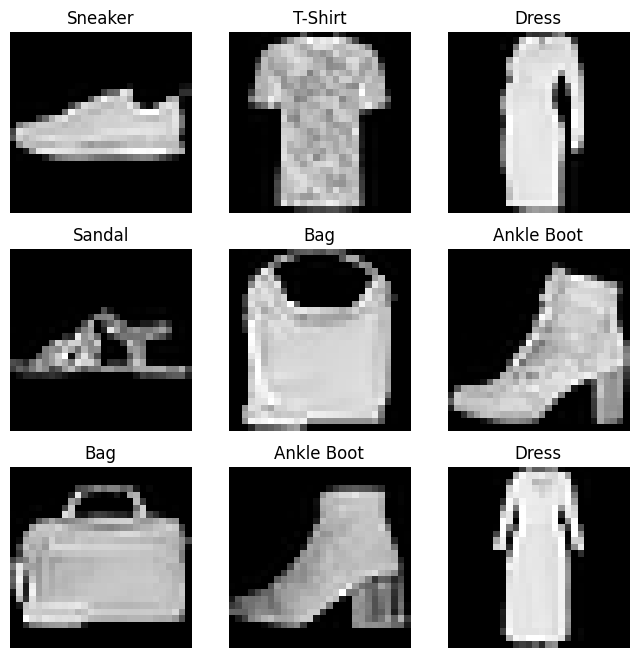

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.



In [16]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

The __len__ function returns the number of samples in our dataset.

The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

# Preparing your data for training with DataLoaders

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


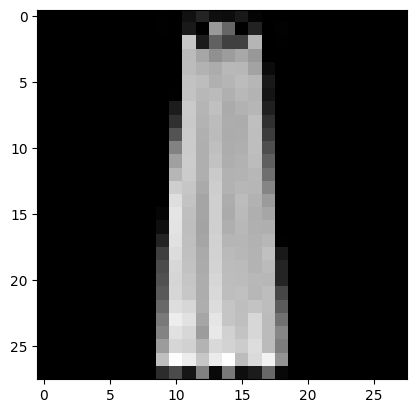

Label: 3


In [18]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")